#### Computer Vision. Homework 2

# Task 1. Text Separation

#### by Anastasiia Khaburska

In [1]:
import numpy as np
import cv2
import os
from skimage import io
from numpy.linalg import solve
from PIL import Image
import matplotlib.patches as patches
import matplotlib 
from matplotlib import pyplot as plt


In [2]:
def whiten_pixels_out_of_rectangles(image, rectangles):
    whitened=image.copy()
    x_len, y_len = image.shape
    for i in range(x_len):
        for j in range(y_len):
            not_in_rectangles=True
            for r in rectangles:
                if is_pixel_in_rectangle(i, j, r):
                    not_in_rectangles=False
            if not_in_rectangles:
                whitened[i,j]=255
    return whitened

def grayten_pixels_out_of_rectangles(image, rectangles):
    whitened=image.copy()
    x_len, y_len = image.shape
    for i in range(x_len):
        for j in range(y_len):
            not_in_rectangles=True
            for r in rectangles:
                if is_pixel_in_rectangle(i, j, r):
                    not_in_rectangles=False
            if not_in_rectangles:
                whitened[i,j]=100
    return whitened

def whiten_pixels_in_rectangles(image, rectangles):
    whitened=image.copy()
    x_len, y_len = image.shape
    for i in range(x_len):
        for j in range(y_len):
            for r in rectangles:
                if is_pixel_in_rectangle(i, j, r):
                    whitened[i,j]=255
    return whitened
        
def is_pixel_in_rectangle( x, y, rectangle):
    is_in_rectangle = False
    if y > rectangle['x1'] and y < rectangle['x2'] and x > rectangle['y1'] and x < rectangle['y2']:
            is_in_rectangle = True
    return is_in_rectangle

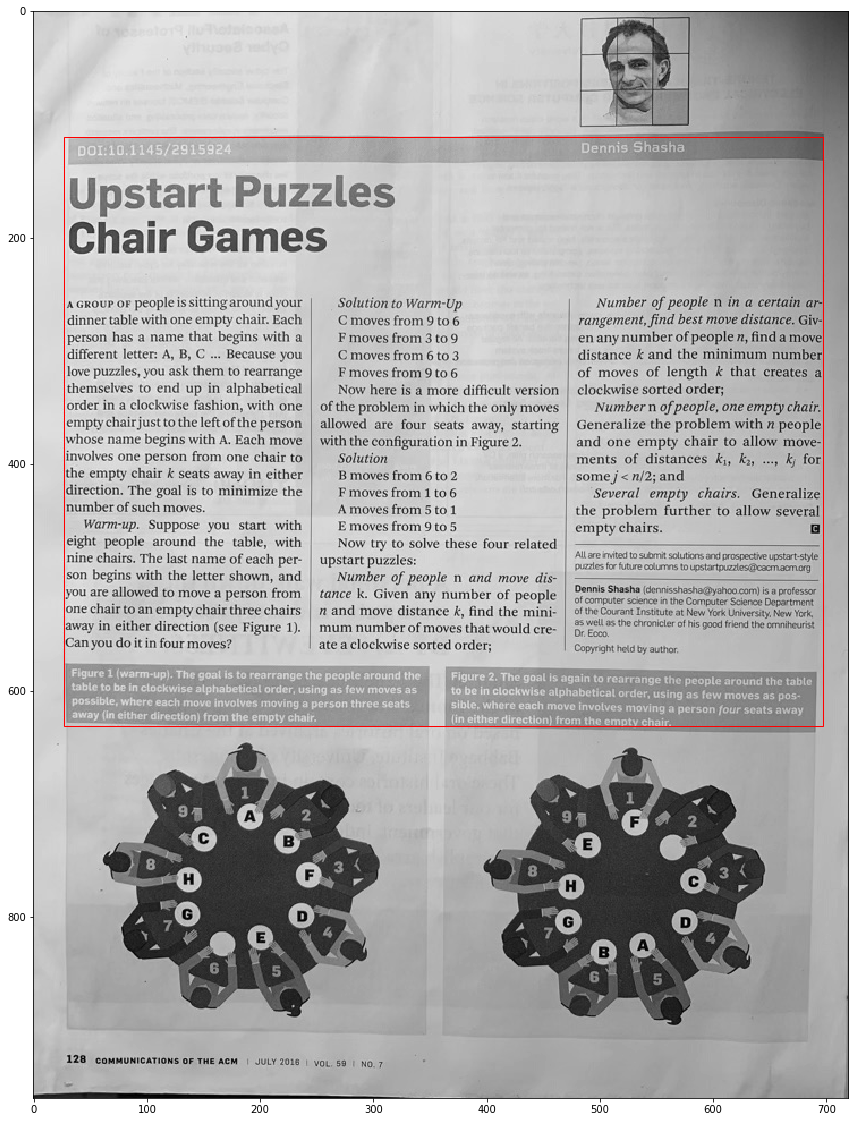

In [3]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img1=cv2.imread('./text1.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1)
ax.imshow(gray1, cmap='gray', vmin=0, vmax=255)
rect = patches.Rectangle((27,111),670,520,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.show()

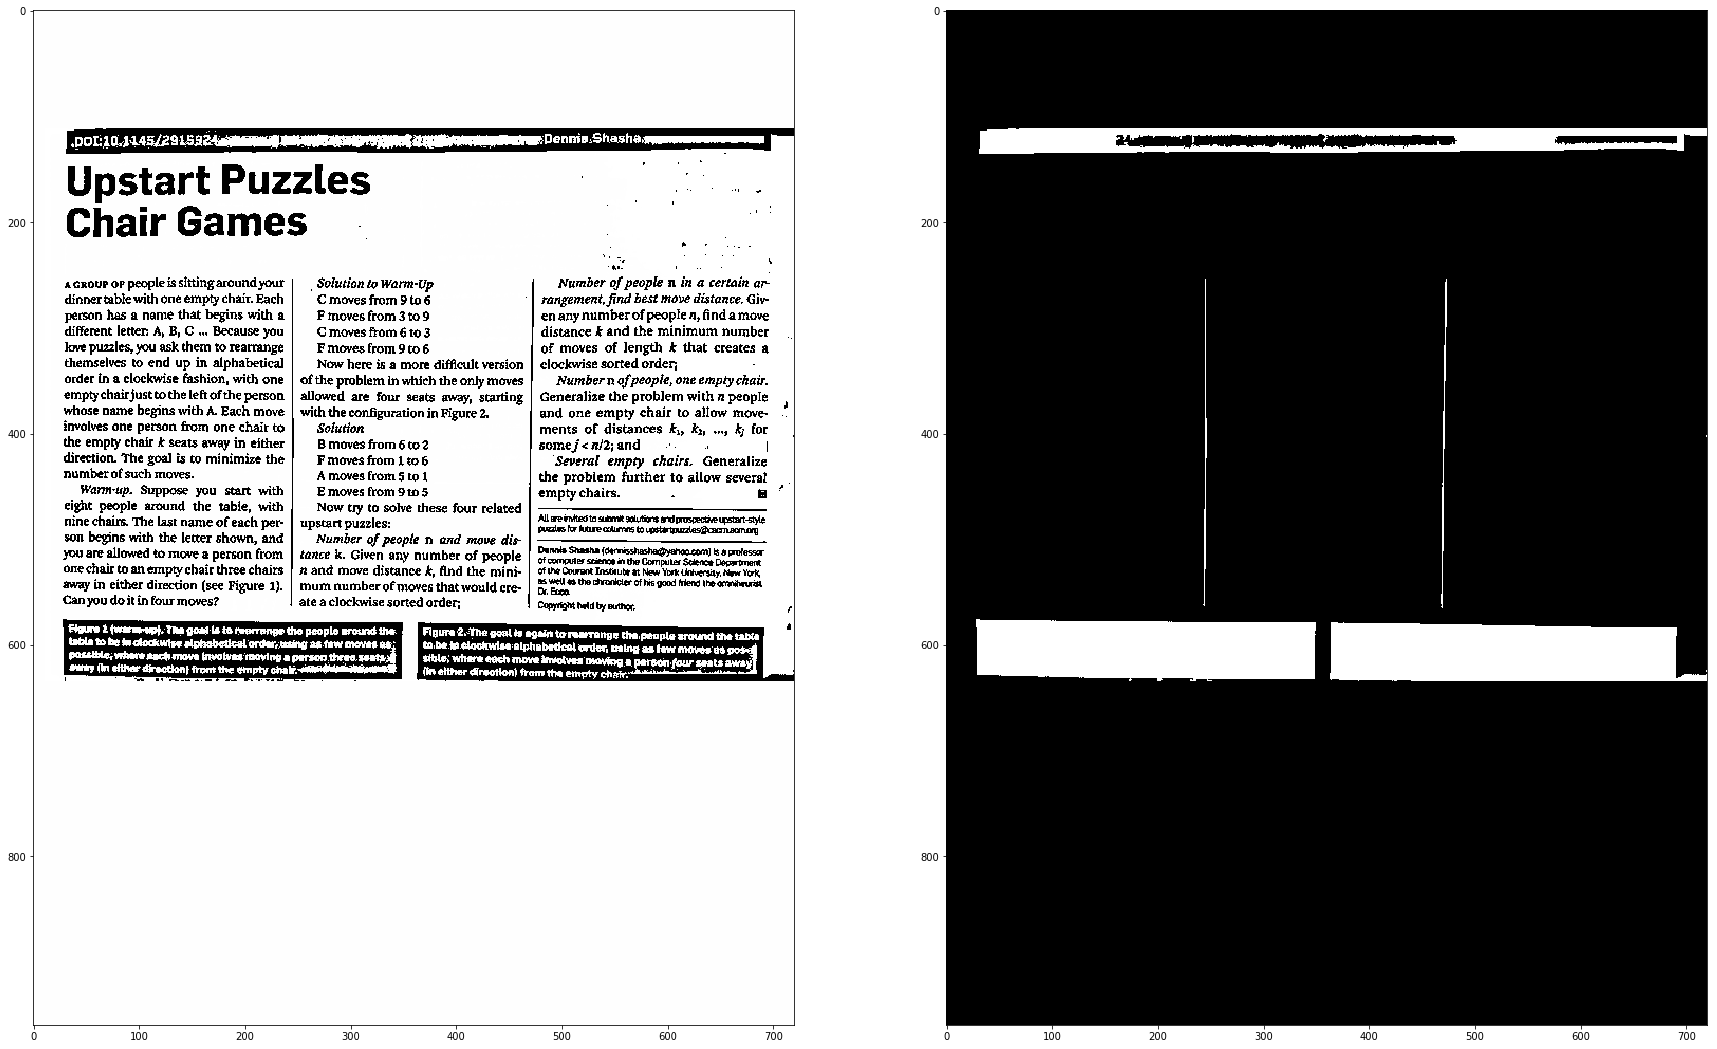

In [4]:
gray1_whitened = whiten_pixels_out_of_rectangles(gray1, [{'x1':10, 'x2':720, 'y1':111, 'y2':635}])
ret1, g1_tresh = cv2.threshold(gray1_whitened,190,255,cv2.THRESH_BINARY)
g1_mean = cv2.adaptiveThreshold(gray1_whitened,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,5)
g1=g1_tresh+g1_mean
contours_1, hierarchy_1 = cv2.findContours(g1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


contour_list_1 = []
for contour in contours_1:
    area = cv2.contourArea(contour)
    if area > 600 :
        contour_list_1.append(contour)

mask1 = np.zeros((g1.shape[0],g1.shape[1]), np.uint8)
cv2.drawContours(mask1, contour_list_1,  -1, (255,255,255), -1)
mask1=255-mask1

#g1_gauss = cv2.adaptiveThreshold(thresh1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,3)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g1, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(mask1, cmap='gray', vmin=0, vmax=255)

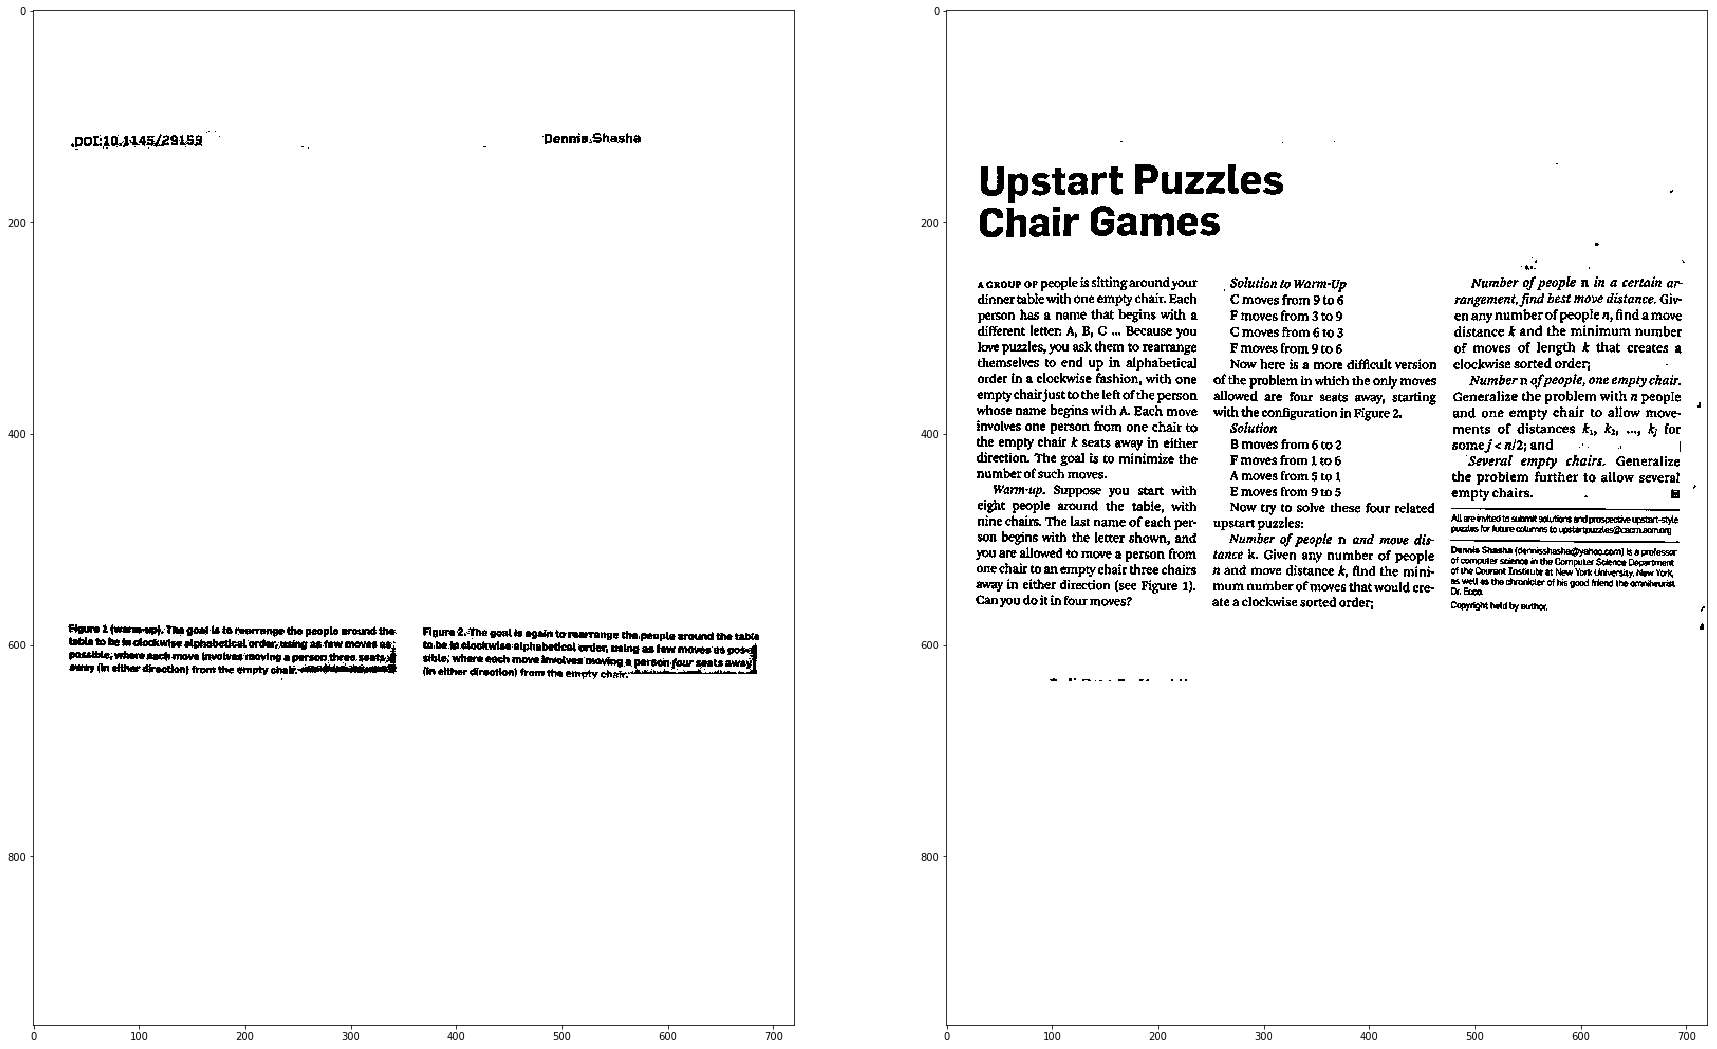

In [5]:
result1_white = 254 + (mask1 * g1 + (1 - mask1-1) * (1 - g1))
#retval1, result1_white = cv2.threshold(result1_white, 50, 255, cv2.THRESH_BINARY) 
result1_white_adtr = cv2.adaptiveThreshold(result1_white, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,9)
#result1_white_adtr_NL = cv2.fastNlMeansDenoising(result1_white_adtr,None,50,35,5)
retval1, result1_white = cv2.threshold(result1_white_adtr, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

result1_black_0 = 1 - (mask1 * g1 + (1 - mask1) * (1 -g1))
retval1, result1_black_0= cv2.threshold(result1_black_0 , 100, 255, cv2.THRESH_BINARY)
result1_black_NL = cv2.fastNlMeansDenoising(result1_black_0,None,50,30,3)
retval1, result1_black= cv2.threshold(result1_black_NL, 130, 255, cv2.THRESH_BINARY)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(result1_white, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(result1_black, cmap='gray', vmin=0, vmax=255)

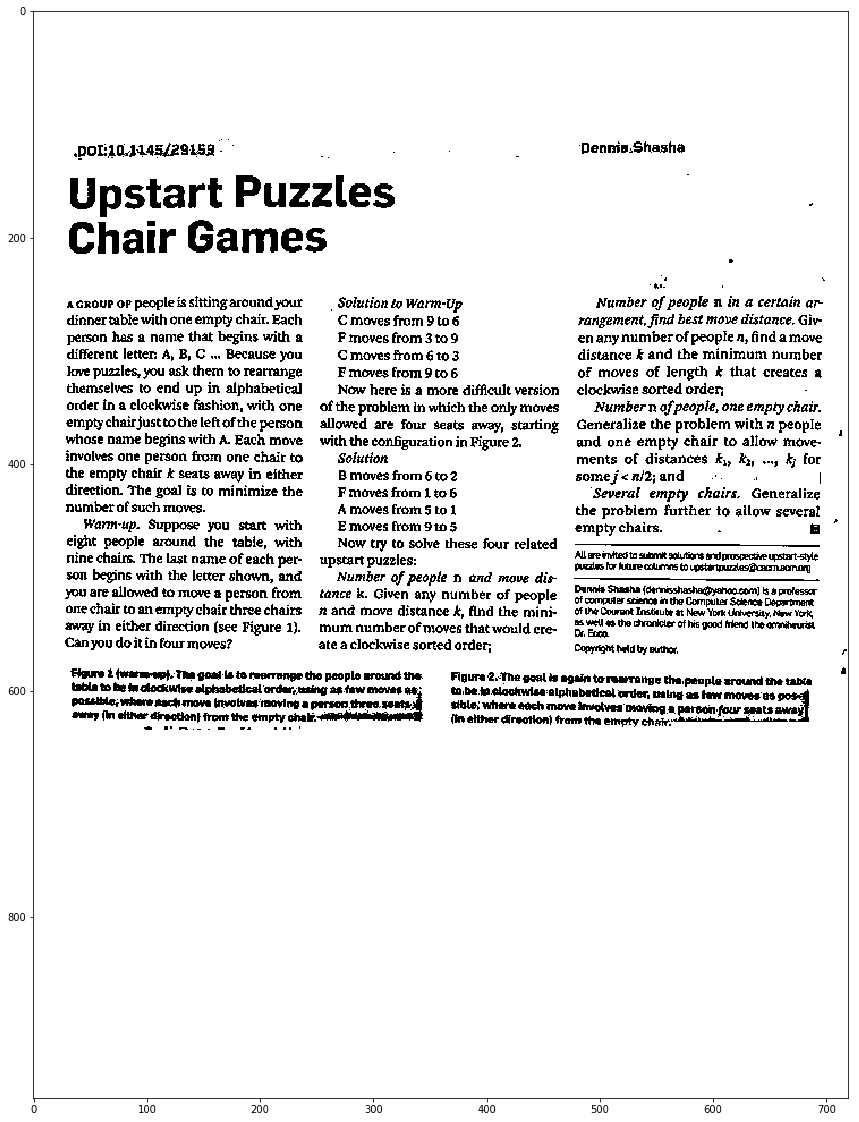

In [6]:
result1=1+result1_black+result1_white 
plt.imshow(result1 , cmap='gray', vmin=0, vmax=255)

In [7]:
#gray1_whitened = whiten_pixels_out_of_rectangle(gray1, [{'x1':27, 'x2':700, 'y1':111, 'y2':635}])
#gray1_whitened_1 = whiten_pixels_out_of_rectangles(gray1+60, [{'x1':27, 'x2':700, 'y1':111, 'y2':132}])
#gray1_whitened_2 = whiten_pixels_out_of_rectangles(gray1, [{'x1':27, 'x2':700, 'y1':135, 'y2':221}])
#gray1_whitened_3 = whiten_pixels_out_of_rectangles(gray1, [{'x1':27, 'x2':700, 'y1':220, 'y2':581}])
#gray1_whitened_4 = whiten_pixels_out_of_rectangles(gray1+100, [{'x1':27, 'x2':700, 'y1':580, 'y2':631}])
#gray_together=gray1_whitened_1+gray1_whitened_2+gray1_whitened_3+gray1_whitened_4

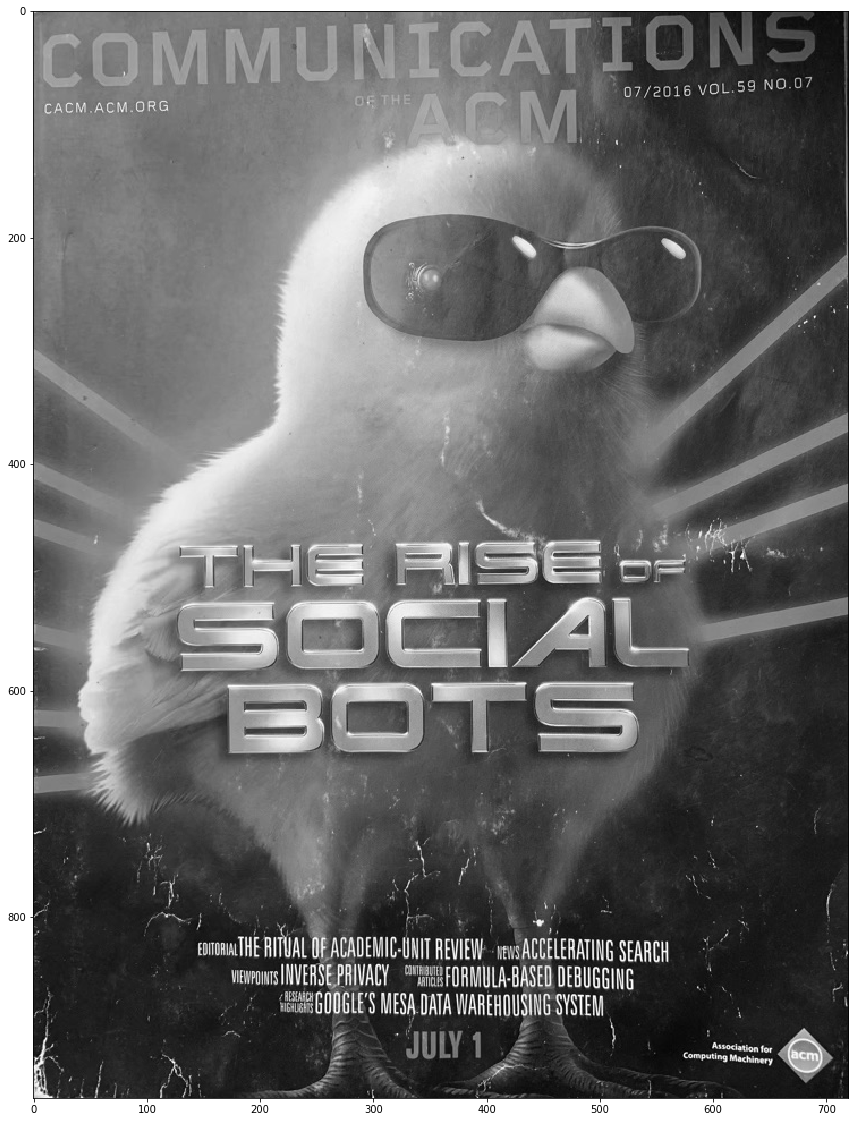

In [8]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img2=cv2.imread('./text2.jpg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)

In [9]:
gray2.shape

(960, 720)

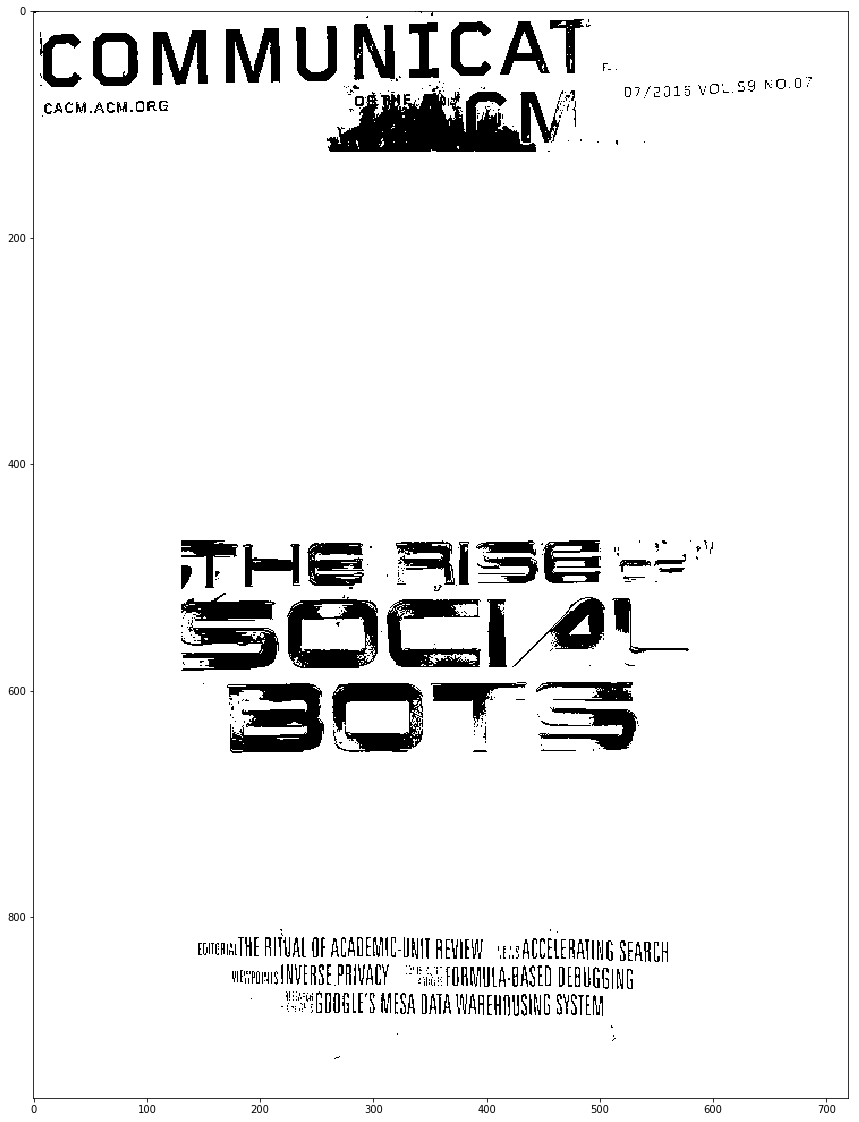

In [10]:
gray2_whitened_1 = whiten_pixels_out_of_rectangles(gray2+30, [{'x1':0, 'x2':720, 'y1':0, 'y2':125}])
gray2_whitened_2 = whiten_pixels_out_of_rectangles(gray2+20, [{'x1':130, 'x2':600, 'y1':467, 'y2':680}])
gray2_whitened_3 = whiten_pixels_out_of_rectangles(gray2, [{'x1':130, 'x2':560, 'y1':810, 'y2':930}])
gray2_together=gray2_whitened_1+gray2_whitened_2+gray2_whitened_3
gray2_whitened = grayten_pixels_out_of_rectangles(gray2_together, [{'x1':0, 'x2':720, 'y1':0, 'y2':125},
                                                        {'x1':130, 'x2':600, 'y1':467, 'y2':680},
                                                        {'x1':130, 'x2':560, 'y1':810, 'y2':930} ])
plt.imshow(gray2_whitened, cmap='gray', vmin=0, vmax=255)

retval, result2= cv2.threshold(gray2_whitened, 170, 255, cv2.THRESH_BINARY)
result2=255-result2
kernel = np.ones((5,5), np.uint8) 
plt.imshow(result2, cmap='gray', vmin=0, vmax=255)

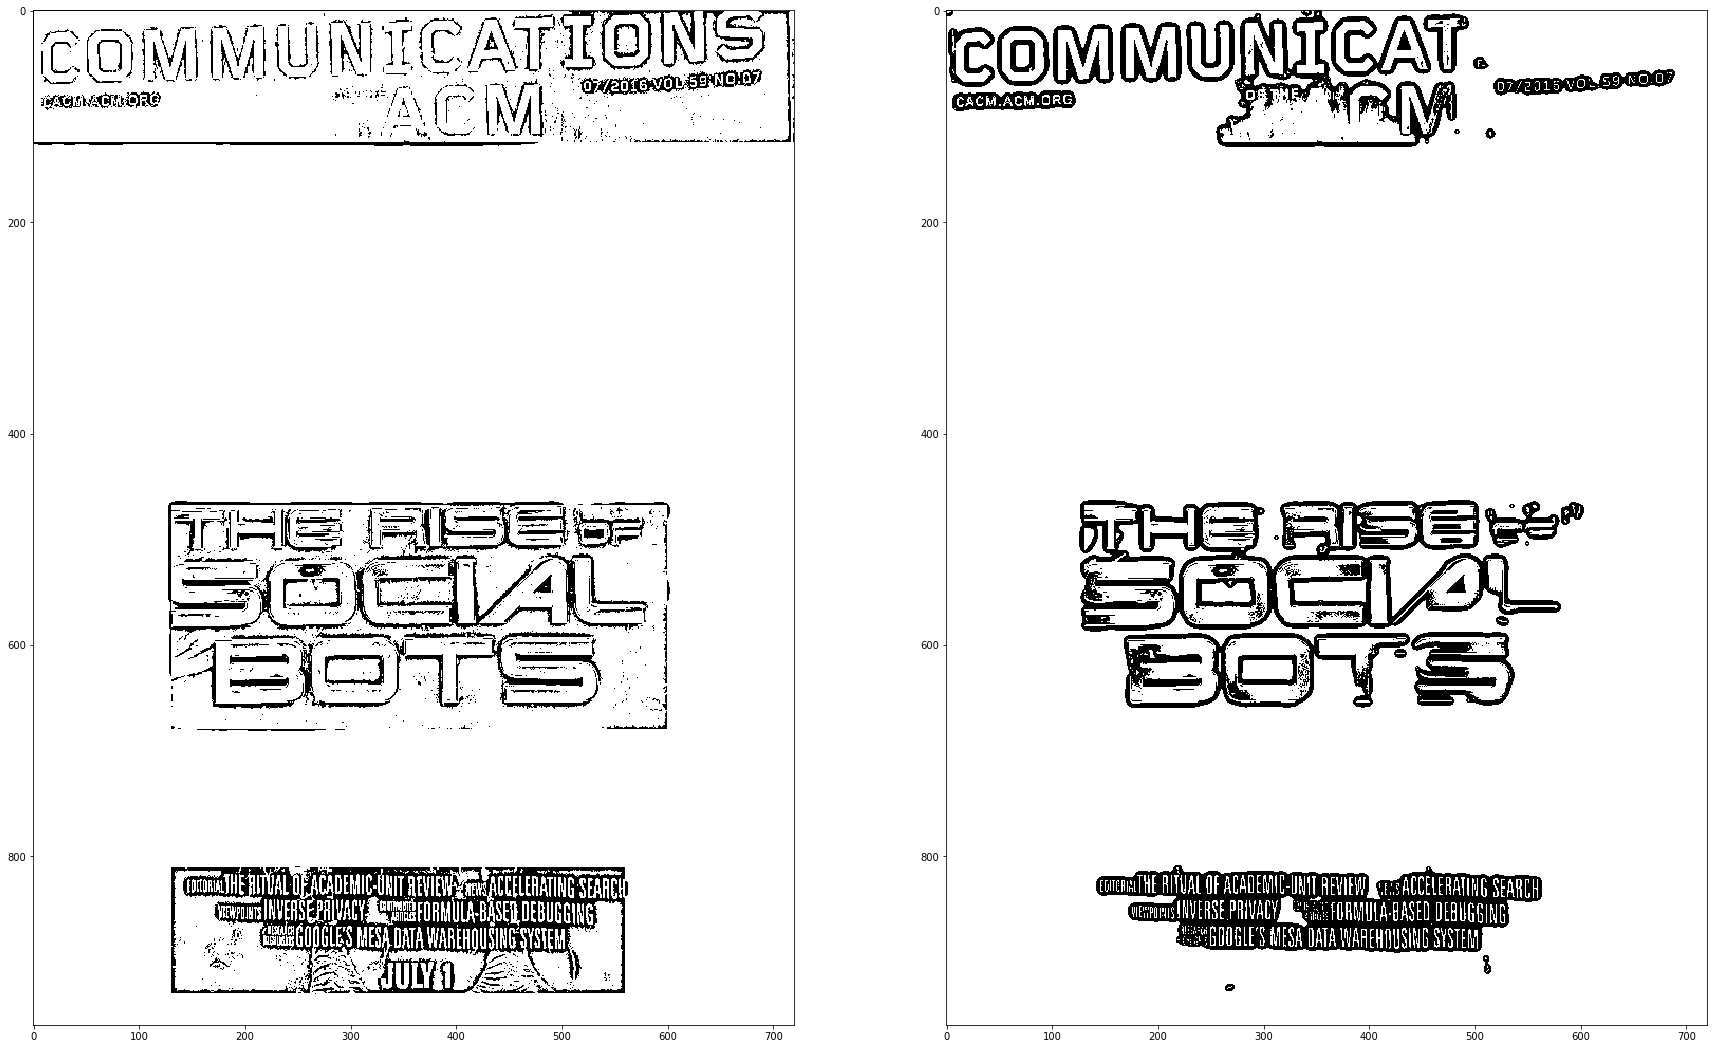

In [11]:
g2_threshold1 = cv2.adaptiveThreshold(gray2_whitened,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,9)
g2_threshold2 = cv2.adaptiveThreshold(255-result2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,9)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g2_threshold1, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(g2_threshold2, cmap='gray', vmin=0, vmax=255)


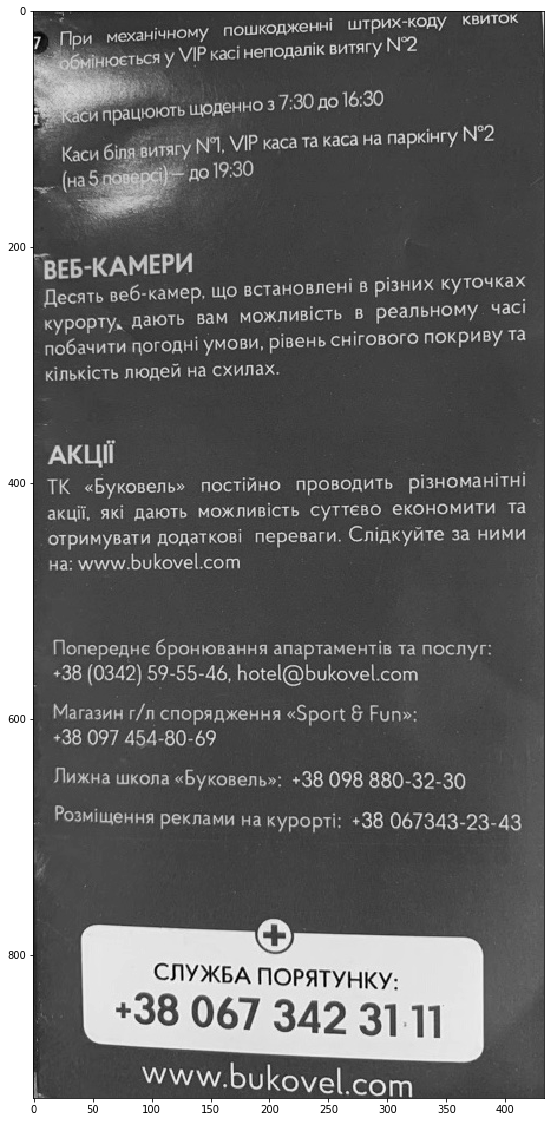

In [12]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img3=cv2.imread('./text3.jpg')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Create figure and axes
fig,ax = plt.subplots(1)
ax.imshow(gray3, cmap='gray', vmin=0, vmax=255)



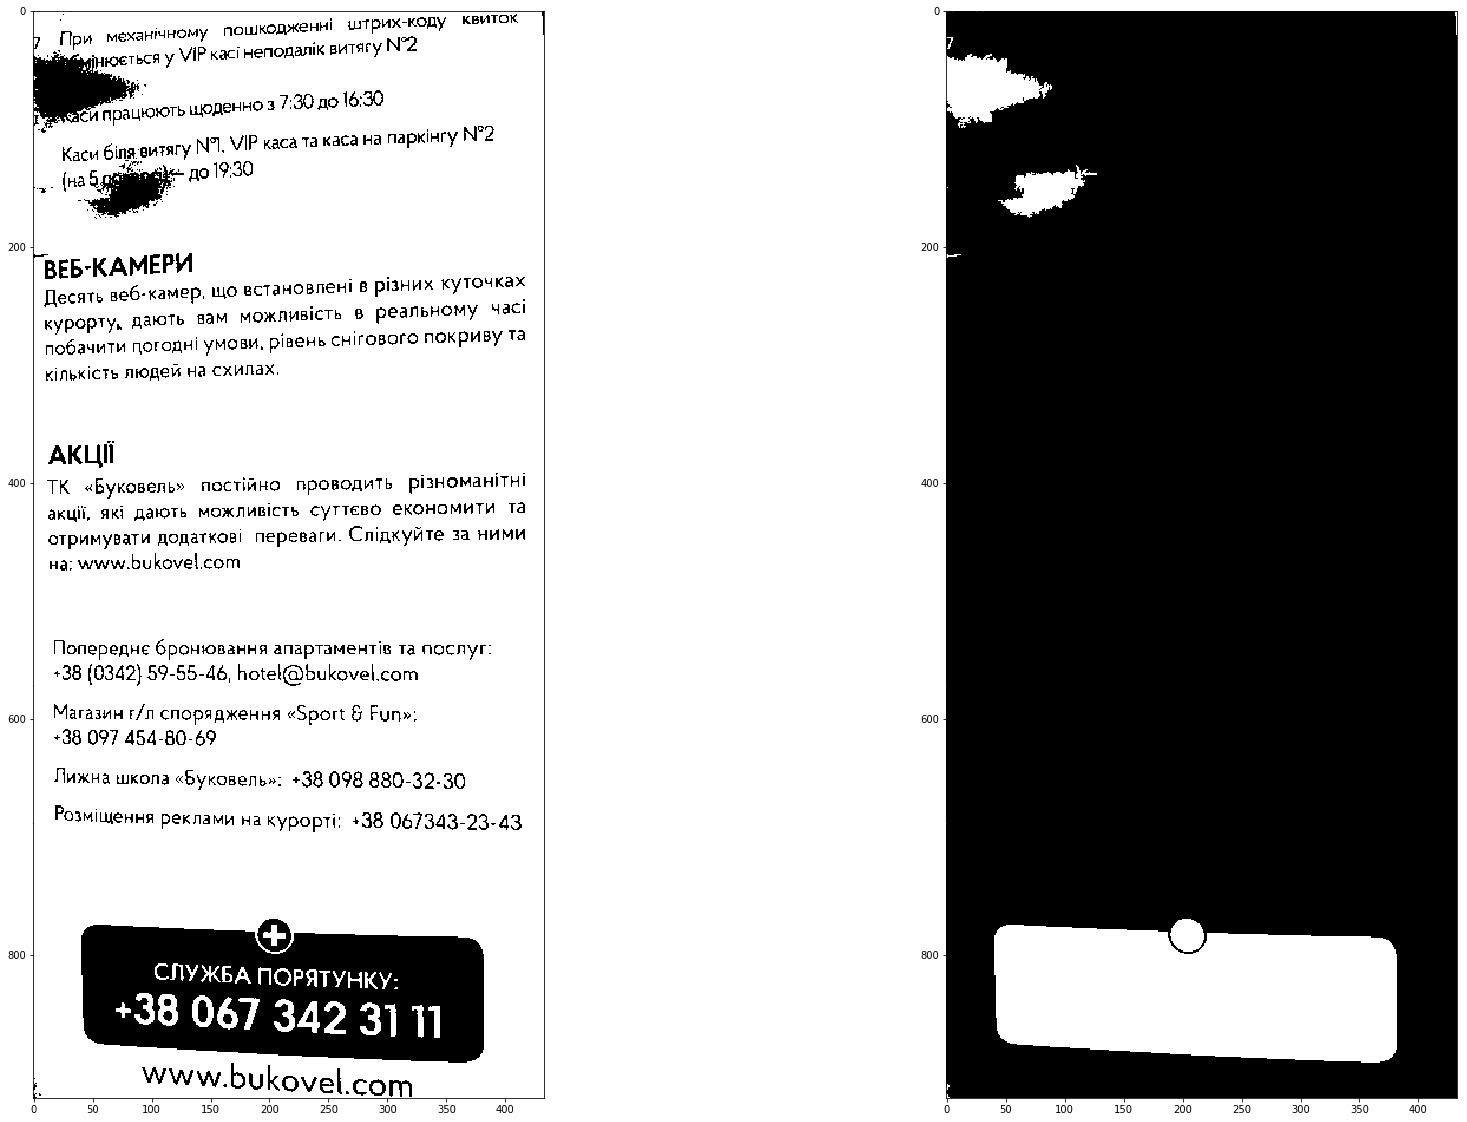

In [13]:
ret3,g3 = cv2.threshold(gray3,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

contours_3, hierarchy_3 = cv2.findContours(g3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list_3 = []
for contour in contours_3:
    area = cv2.contourArea(contour)
    if area > 400 :
        contour_list_3.append(contour)

mask_3 = np.zeros((g3.shape[0],g3.shape[1]), np.uint8)
cv2.drawContours(mask_3, contour_list_3,  -1, (255,255,255), -1)
mask_3=255-mask_3

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g3, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(mask_3, cmap='gray', vmin=0, vmax=255)


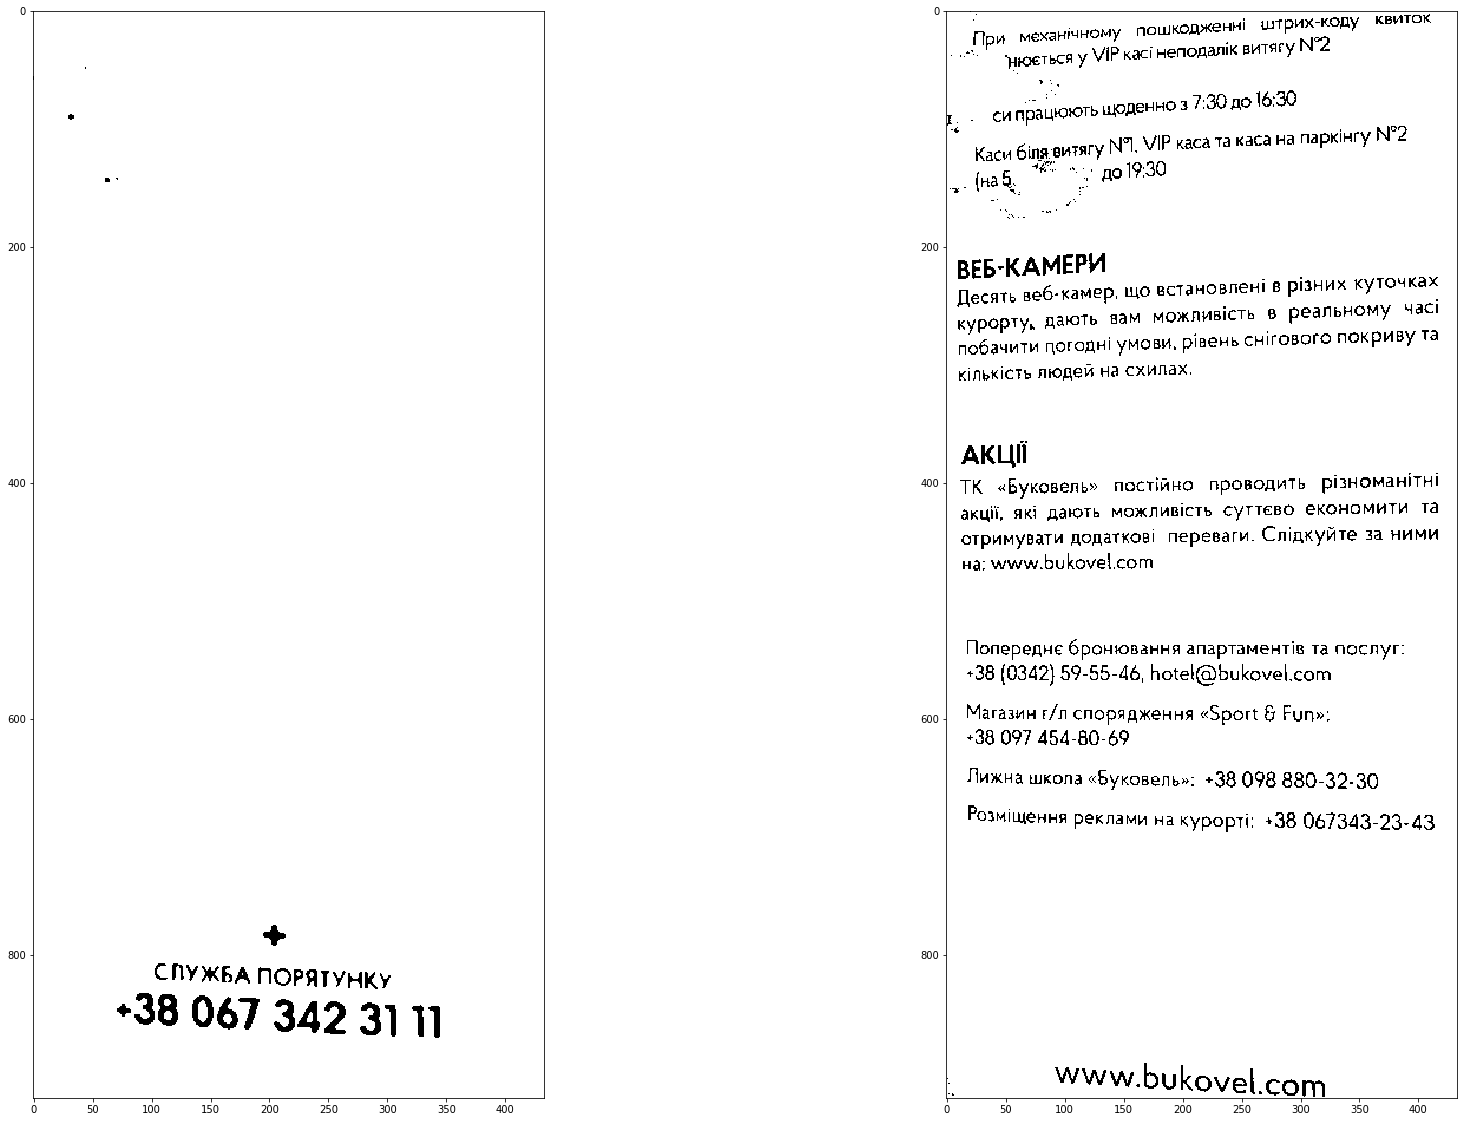

In [14]:
result3_white = 254 + (mask_3 * g3 + (1 - mask_3-1) * (1 -g3))
result3_white_adtr = cv2.adaptiveThreshold(result3_white,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,9)
result3_white_adtr_NL = cv2.fastNlMeansDenoising(result3_white_adtr,None,80,35,5)
retval, result3_white = cv2.threshold(result3_white_adtr_NL, 140, 255, cv2.THRESH_BINARY) 

result3_black = 1 - (mask_3 * g3 + (1 - mask_3) * (1 -g3))
retval, result3_black= cv2.threshold(result3_black, 140, 255, cv2.THRESH_BINARY)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(result3_white , cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(result3_black , cmap='gray', vmin=0, vmax=255)

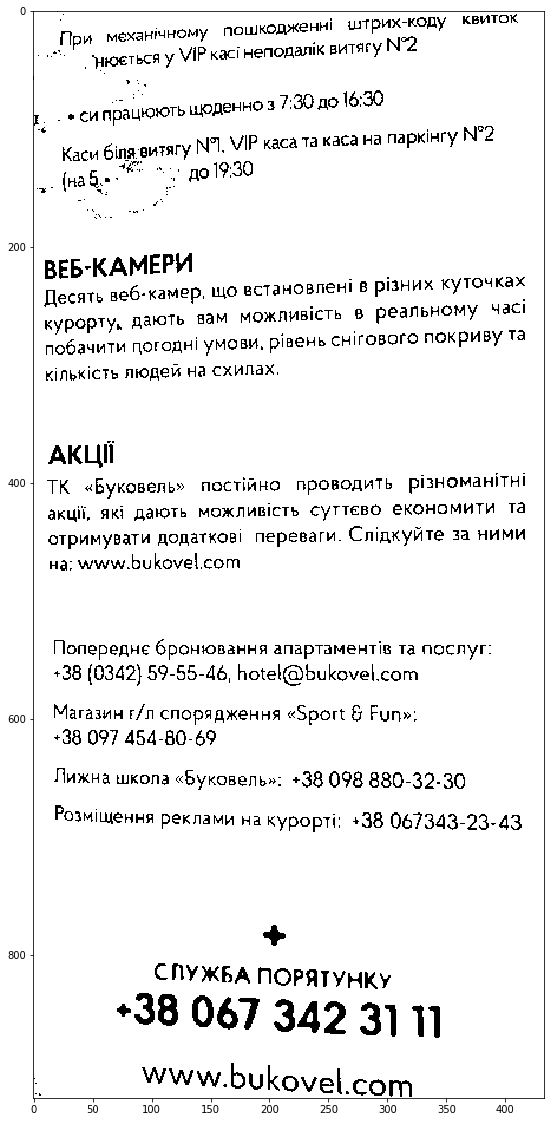

In [15]:
result3=1+result3_black+result3_white 
plt.imshow(result3 , cmap='gray', vmin=0, vmax=255)

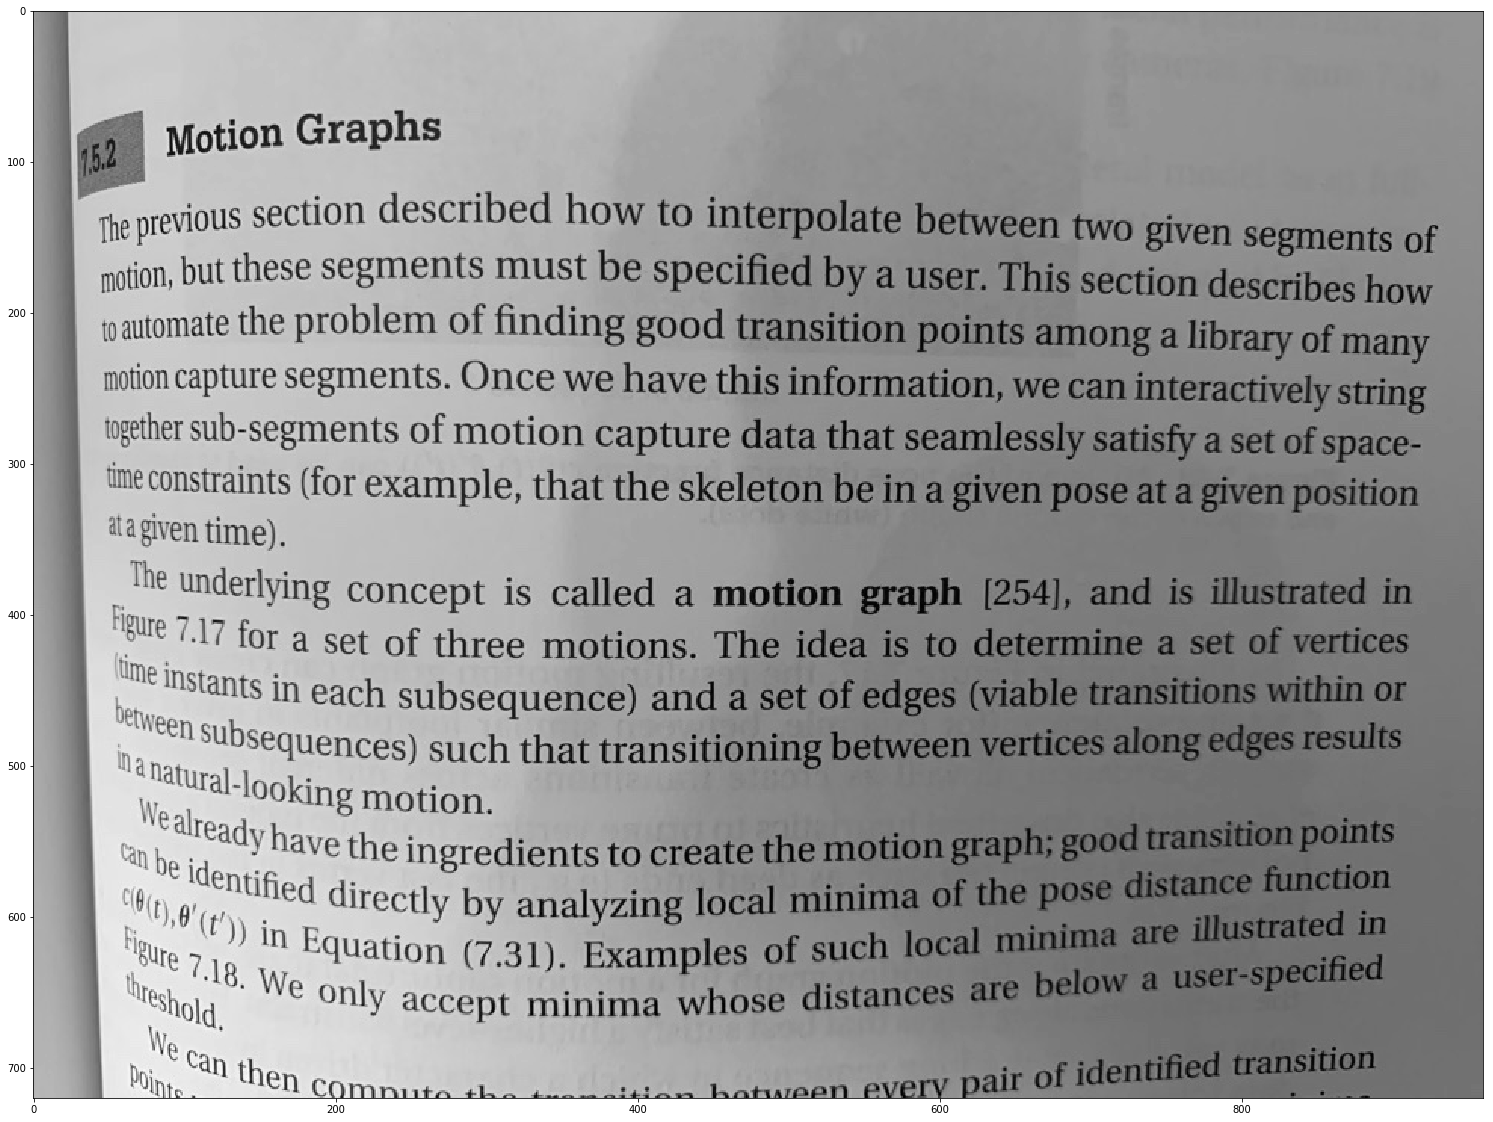

In [16]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img4=cv2.imread('./text4.jpg')
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

plt.imshow(gray4, cmap='gray', vmin=0, vmax=255)

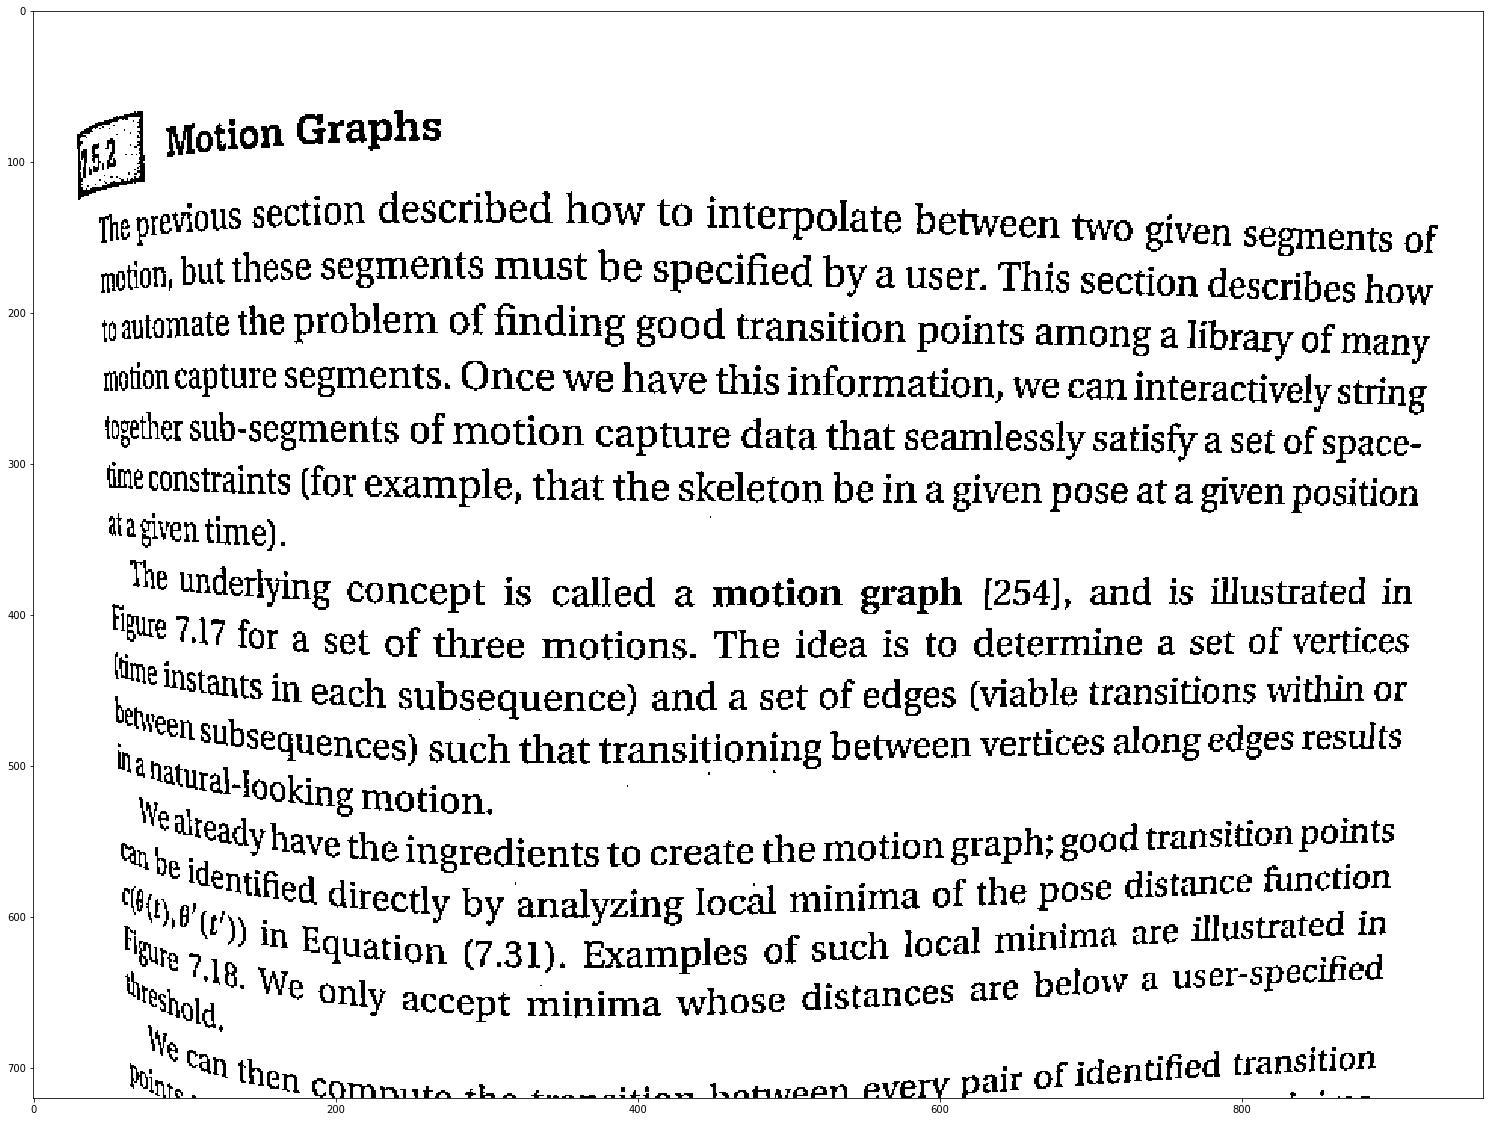

In [17]:
g4 = cv2.adaptiveThreshold(gray4, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 10)
#plt.imshow(g4 , cmap='gray', vmin=0, vmax=255)
g4_with_line=g4.copy()
edges = cv2.Canny(g4_with_line,200,250,apertureSize = 3)
minLineLength=200
lines = cv2.HoughLines(edges,1,np.pi/180,200)
a,b,c = lines.shape
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(g4_with_line,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(g4_with_line , cmap='gray', vmin=0, vmax=255)

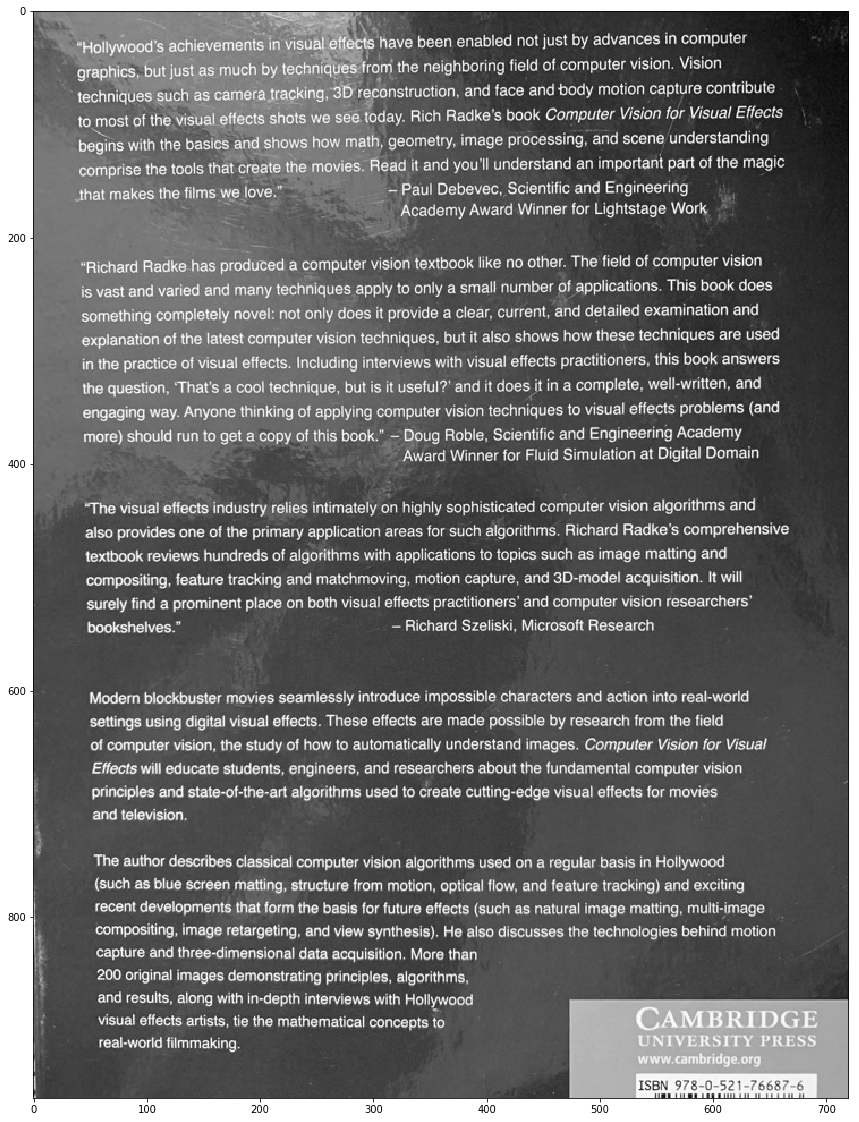

In [18]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img5=cv2.imread('./text5.jpg')
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

plt.imshow(gray5, cmap='gray', vmin=0, vmax=255)

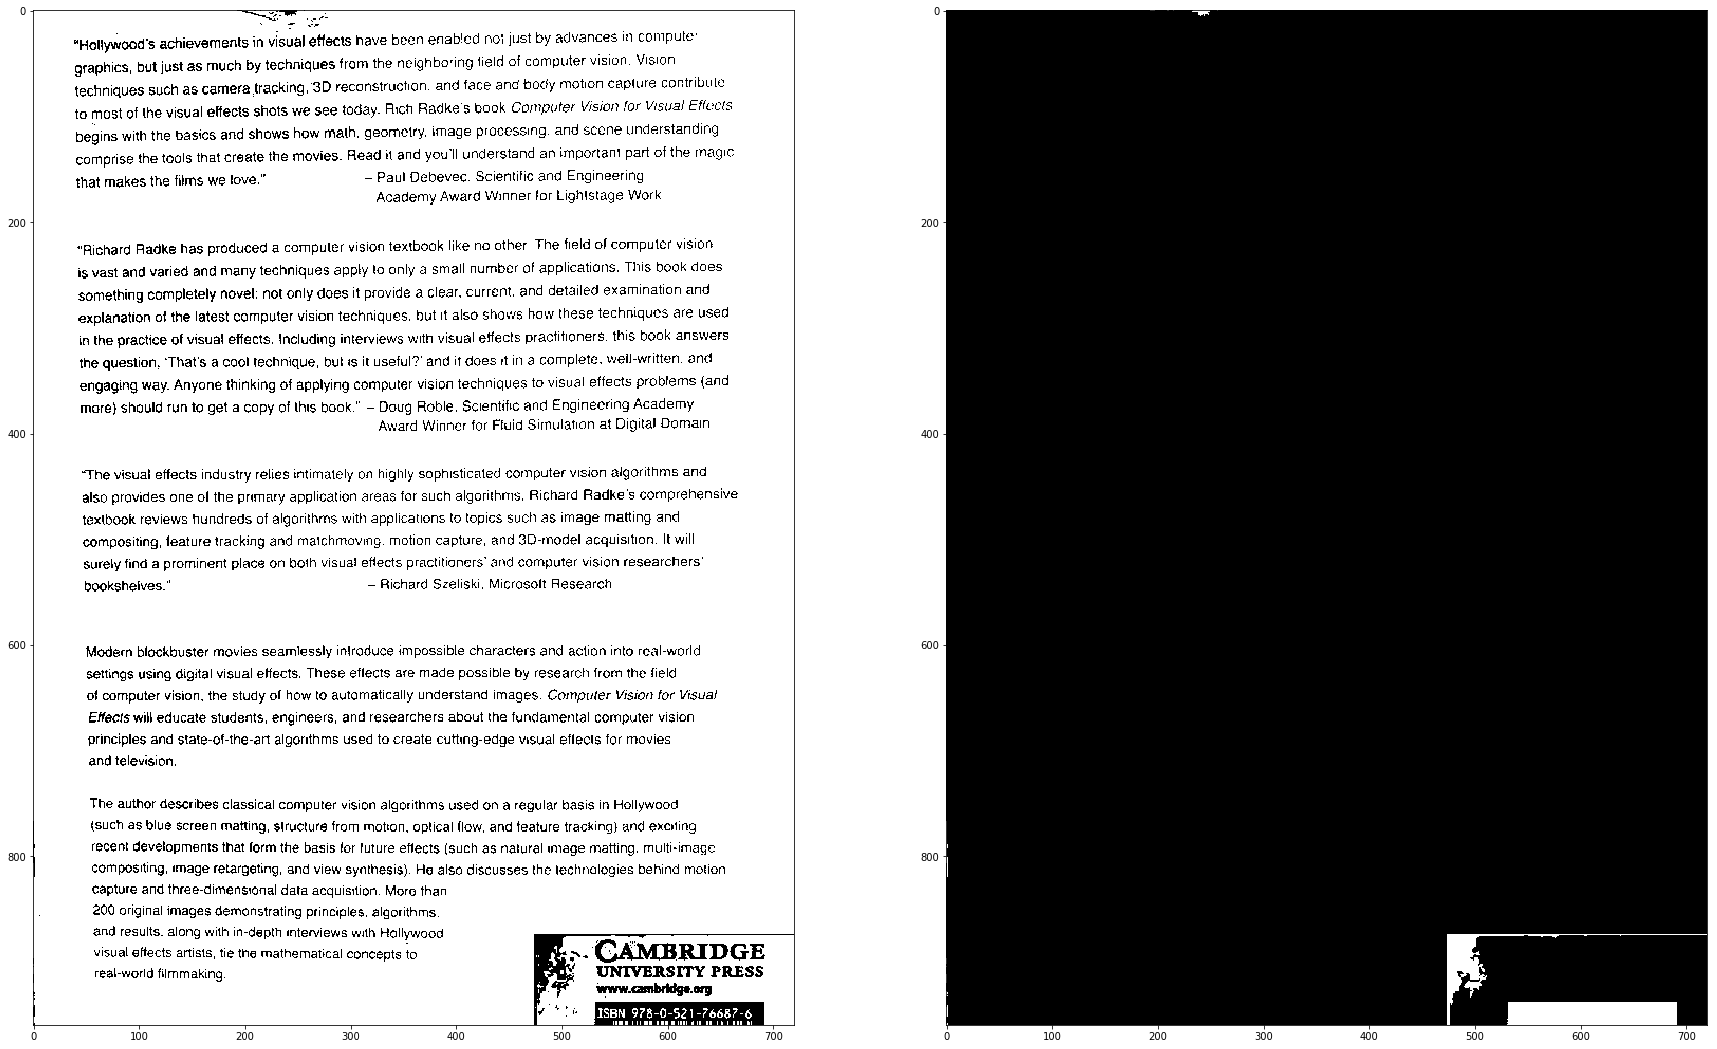

In [19]:
g5 = cv2.threshold(gray5, 180, 255, cv2.THRESH_BINARY_INV)[1]

#gray5 =  cv2.fastNlMeansDenoising(gray5,None,50,13,11)
contours_5, hierarchy_5 = cv2.findContours(g5, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list_5 = []
for contour in contours_5:
    area = cv2.contourArea(contour)
    if area > 950 :
        contour_list_5.append(contour)

mask_5 = np.zeros((g5.shape[0],g5.shape[1]), np.uint8)
cv2.drawContours(mask_5, contour_list_5,  -1, (255,255,255), -1)
mask_5=255-mask_5

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g5, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(mask_5, cmap='gray', vmin=0, vmax=255)


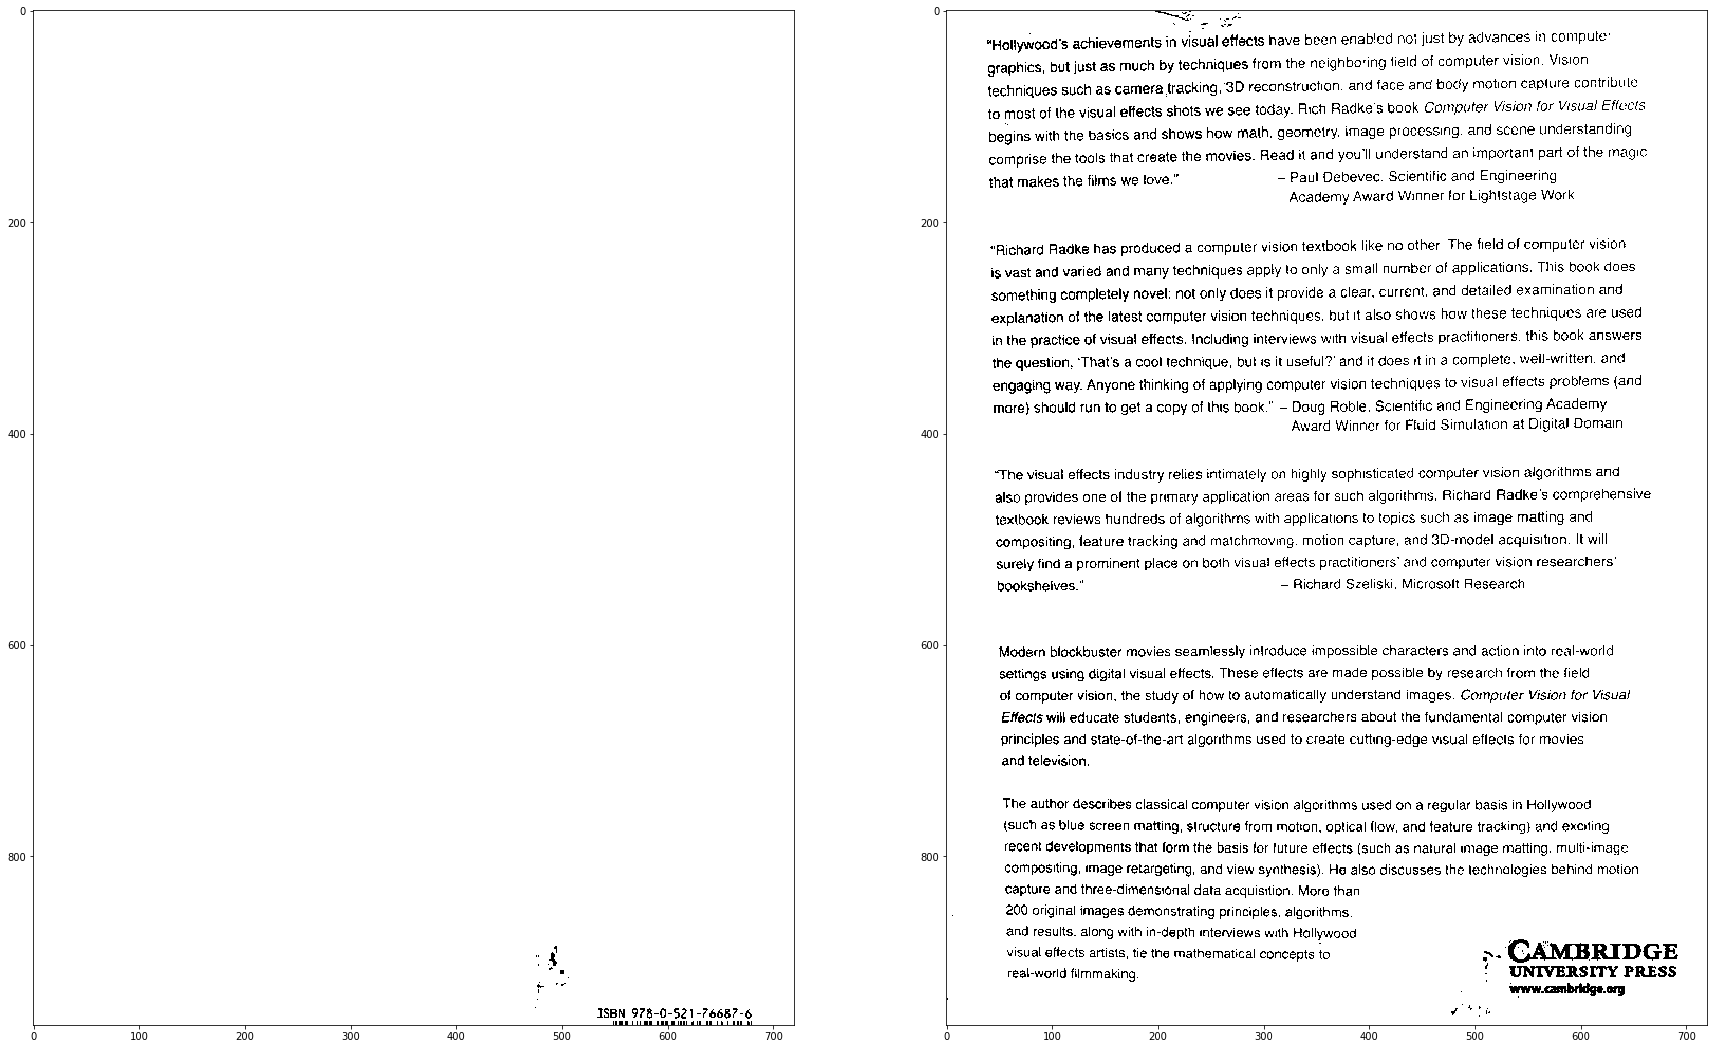

In [20]:
result5_white = 254 + (mask_5 * g5 + (1 - mask_5-1) * (1 -g5))
retval, result5_white = cv2.threshold(result5_white, 140, 255, cv2.THRESH_BINARY) 

result5_black = 1 - (mask_5 * g5 + (1 - mask_5) * (1 -g5))
retval, result5_black= cv2.threshold(result5_black, 140, 255, cv2.THRESH_BINARY)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(result5_white , cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(result5_black , cmap='gray', vmin=0, vmax=255)

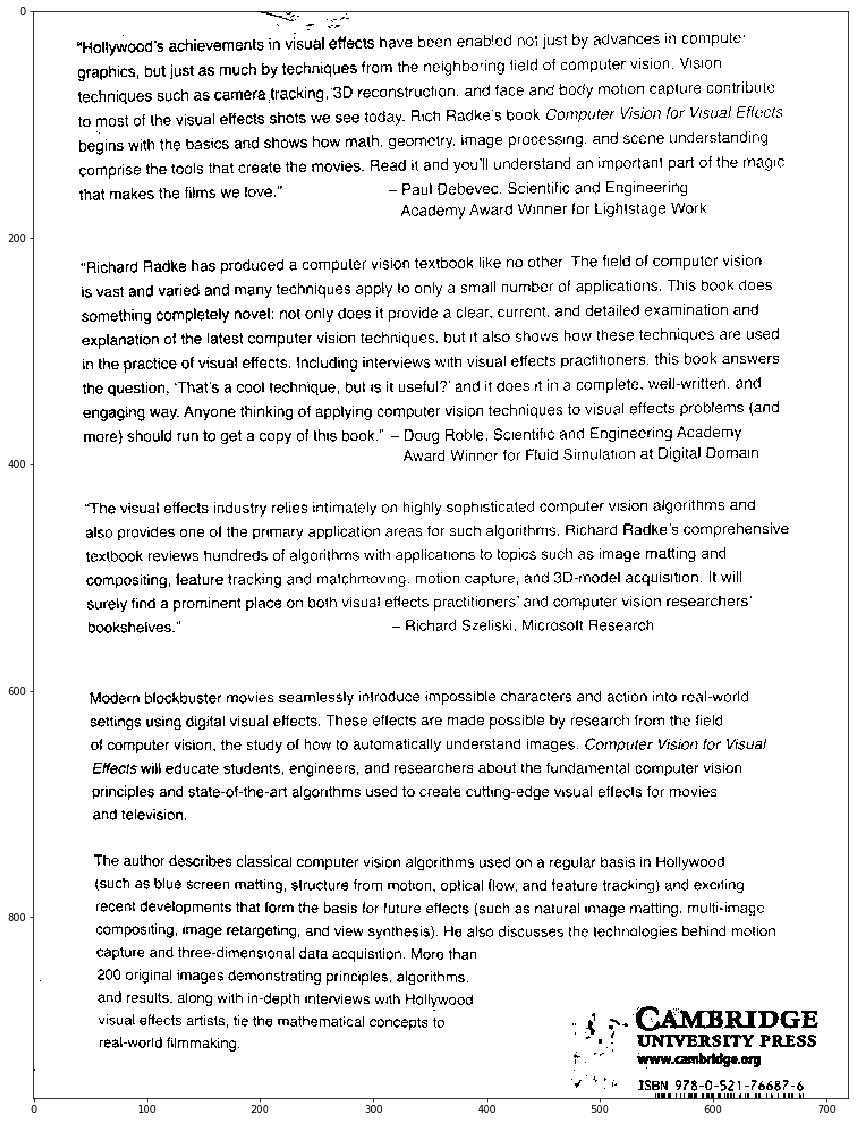

In [21]:
result5=1+result5_black+result5_white 
kernel = np.ones((3,1), np.uint8) 
plt.imshow(result5 , cmap='gray', vmin=0, vmax=255)

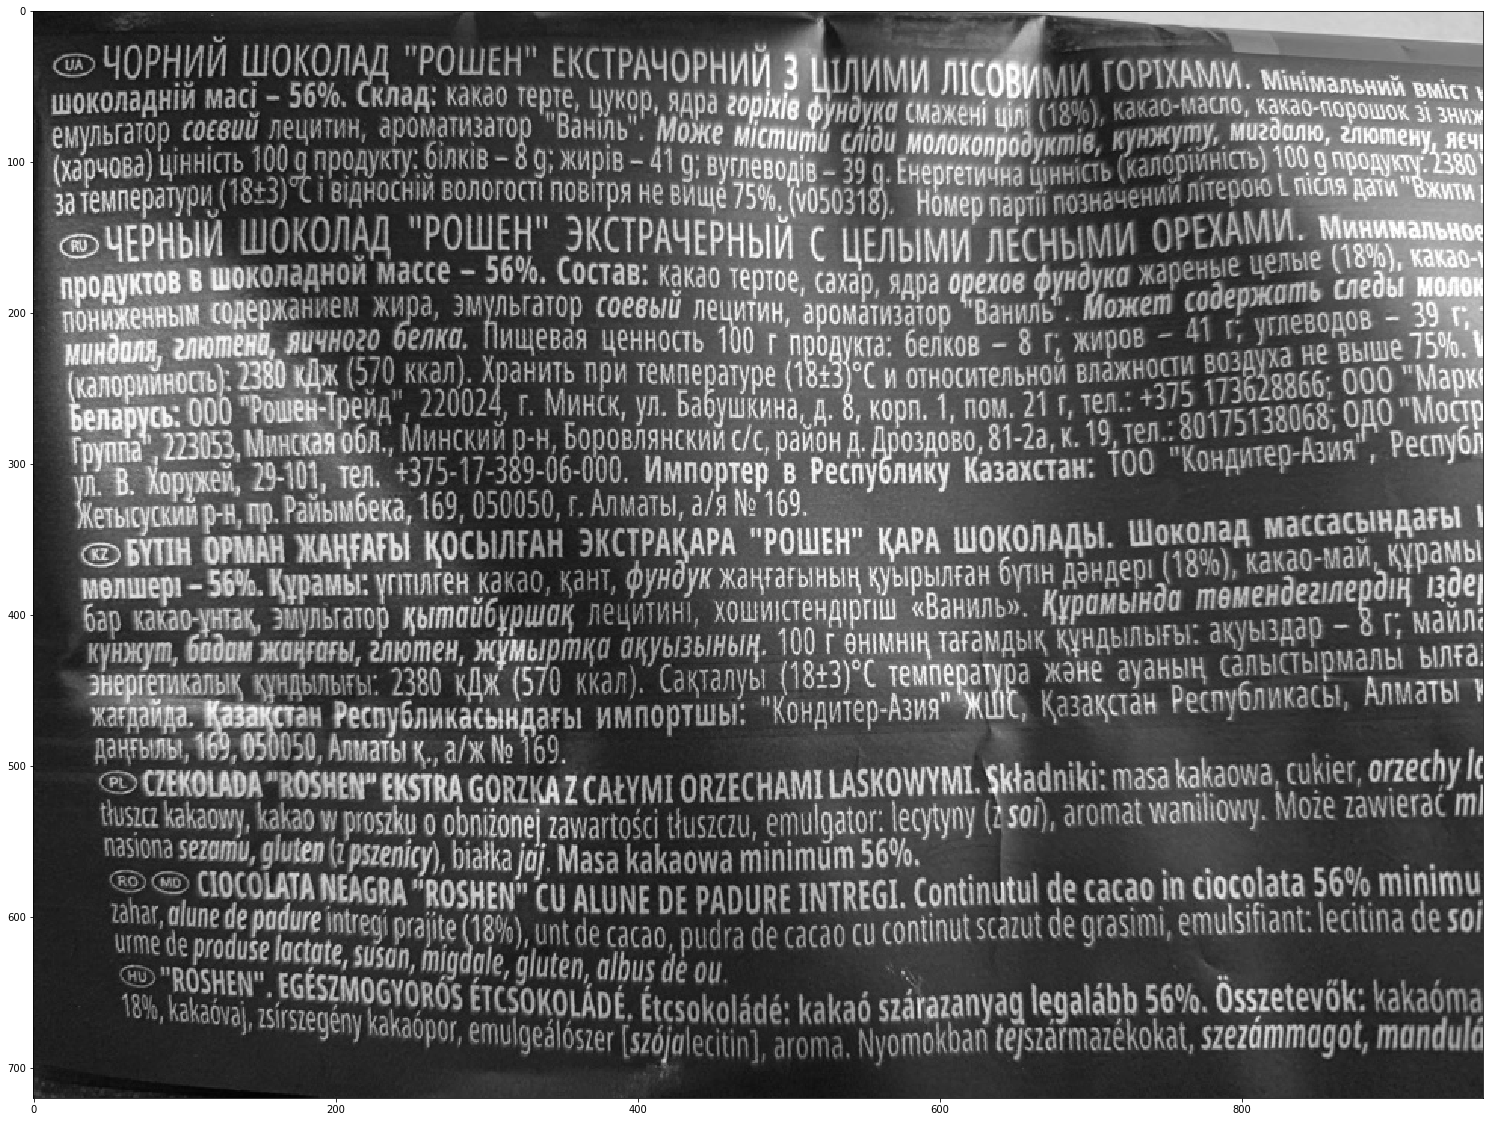

In [22]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
img6=cv2.imread('./text6.jpg')
gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

plt.imshow(gray6, cmap='gray', vmin=0, vmax=255)

In [23]:
g6_adtr = cv2.adaptiveThreshold(gray6, 250, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,-31)
g6 =  cv2.fastNlMeansDenoising(g6_adtr,None,60,7,1)

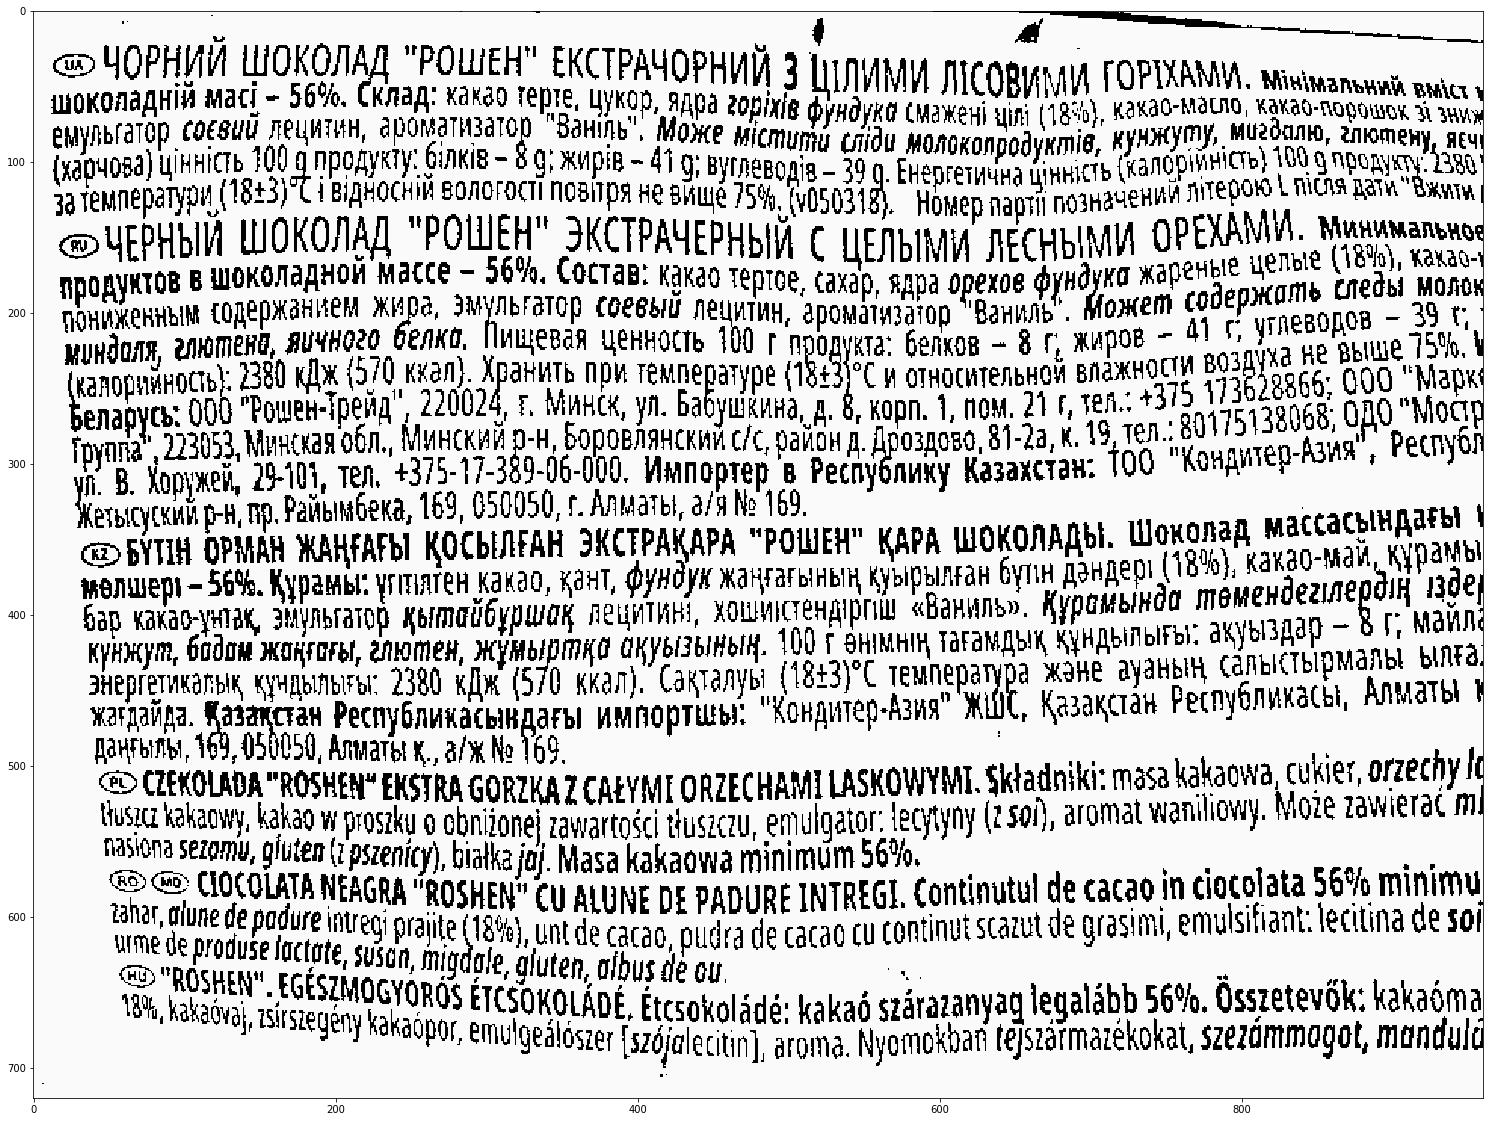

In [24]:
plt.imshow(g6 , cmap='gray', vmin=0, vmax=255)

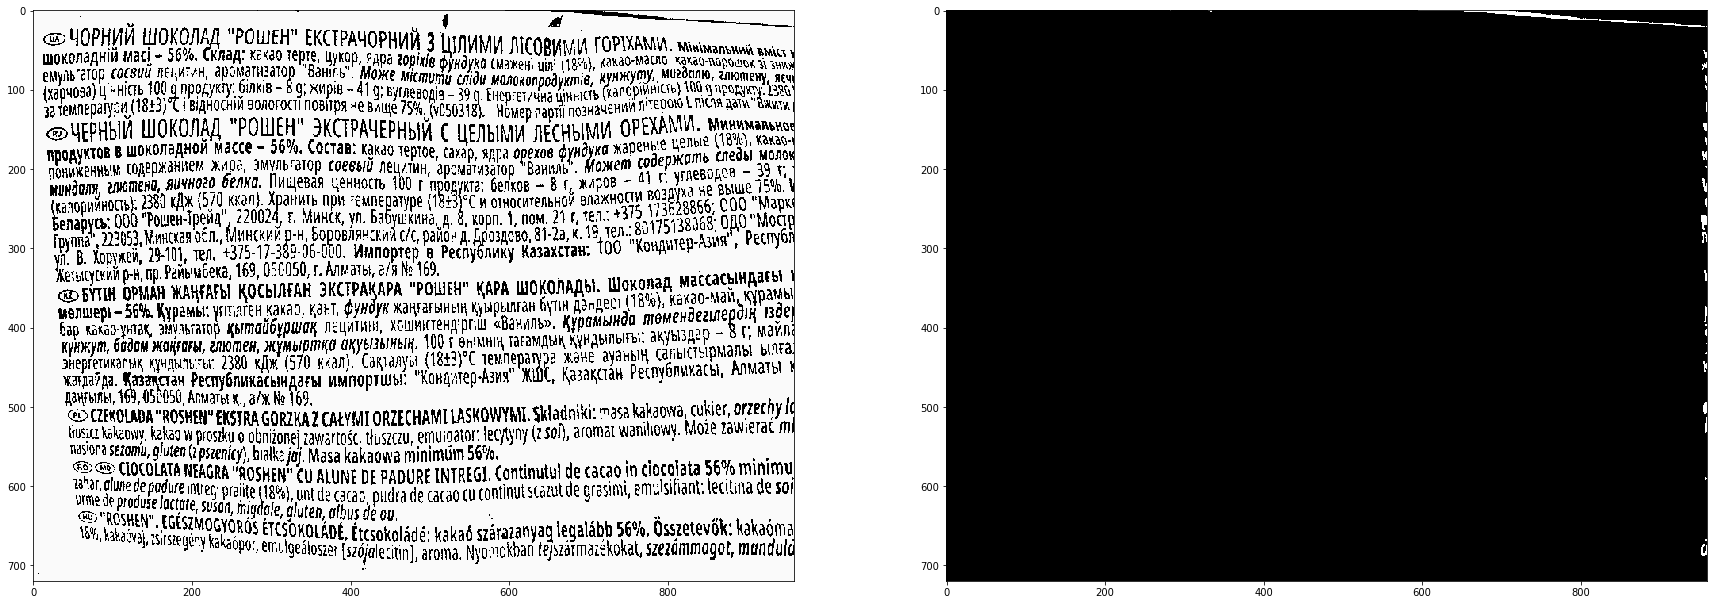

In [25]:
contours_6, hierarchy_6 = cv2.findContours(g6, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list_6 = []
for contour in contours_6:
    area = cv2.contourArea(contour)
    if area > 950 :
        contour_list_6.append(contour)

mask_6 = np.zeros((g6.shape[0],g6.shape[1]), np.uint8)
cv2.drawContours(mask_6, contour_list_6,  -1, (255,255,255), -1)
mask_6=255-mask_6
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g6, cmap='gray', vmin=0, vmax=255)
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(mask_6, cmap='gray', vmin=0, vmax=255)


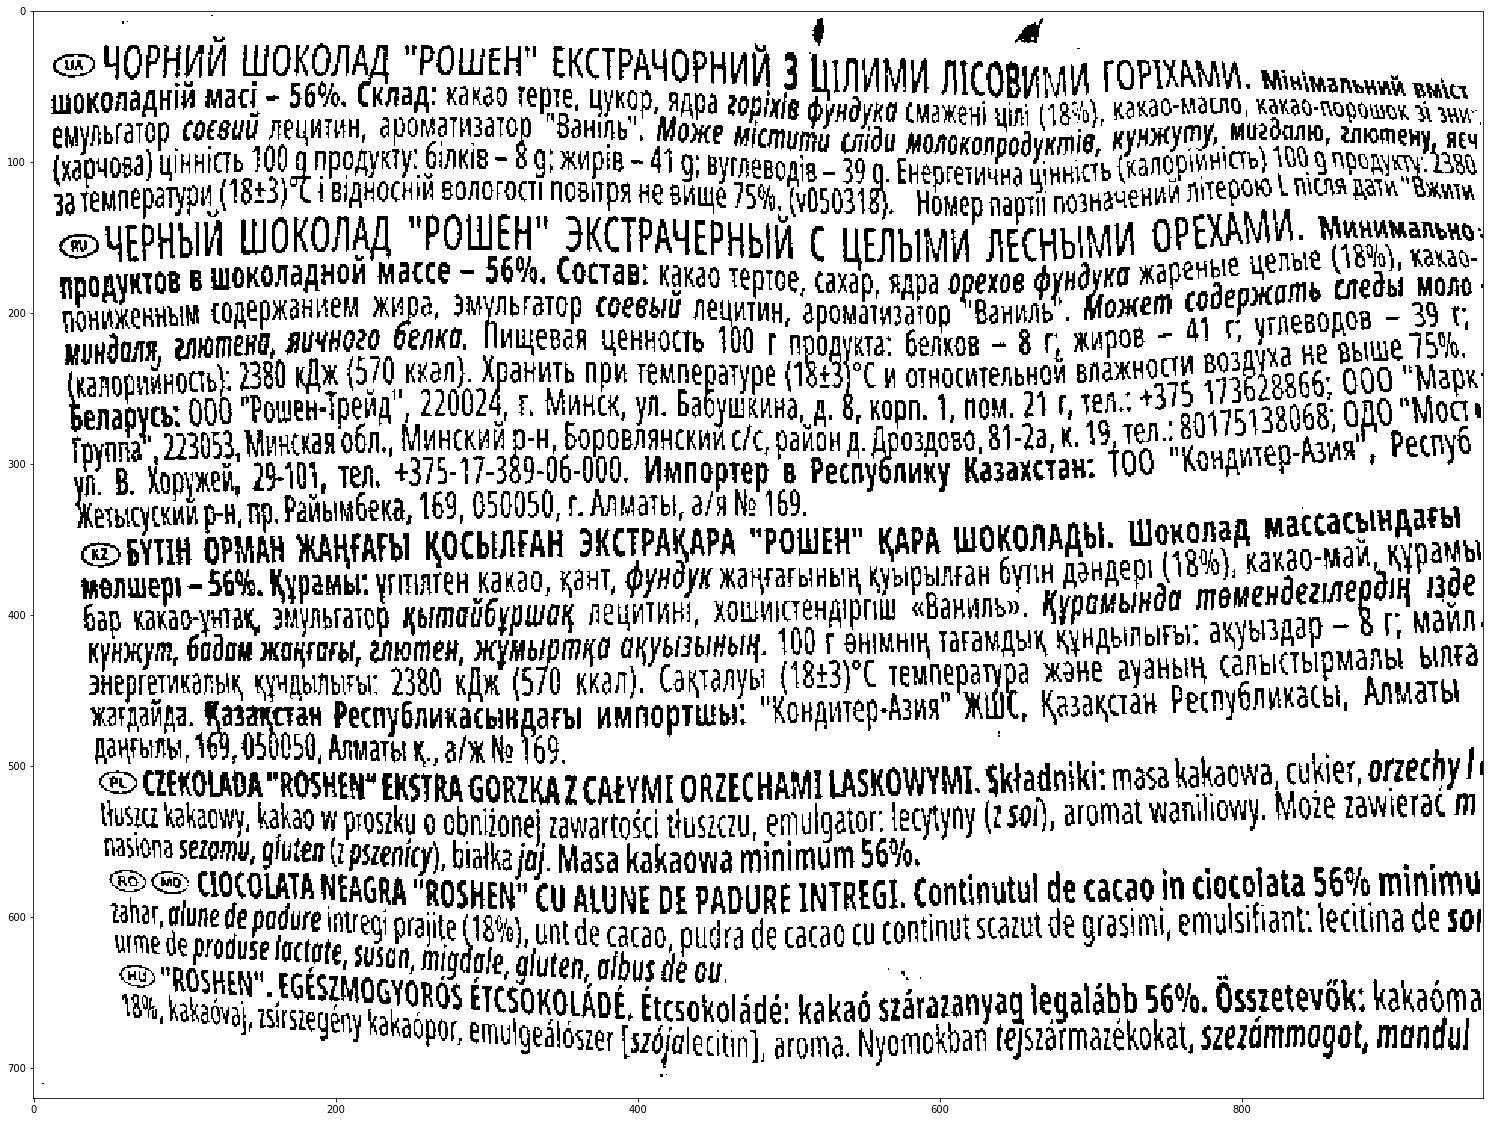

In [26]:
result6_white = 254 + (mask_6 * g6 + (1 - mask_6-1) * (1 -g6))
retval, result6_white = cv2.threshold(result6_white, 140, 255, cv2.THRESH_BINARY) 

result6_black = 1 - (mask_6 * g6 + (1 - mask_6) * (1 -g6))
retval, result6_black= cv2.threshold(result6_black, 140, 255, cv2.THRESH_BINARY)

result6=1+result6_black+result6_white 
plt.imshow(result6 , cmap='gray', vmin=0, vmax=255)